In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import csv
import numpy as np
import numpy as np

In [2]:
!python3 setup.py

In [3]:
cfg = {
    "objects" : [
        {
            "x" : 0.0, 
            "y" : 7645200.0,
            "z" : 0.0,
            "vx" : 7220.0,
            "vy" : 0.0,
            "vz" : 0.0,
            "size" : 1.0
        }
    ],
    "time" : 0.0,
    "dt" : 1.0,
    "maxSteps" : 1000.0,
    "steps" : 1000,
    "logObjects" : (0)
}

In [4]:
space_objects = cfg['objects']

In [5]:
space_objects

[{'x': 0.0,
  'y': 7645200.0,
  'z': 0.0,
  'vx': 7220.0,
  'vy': 0.0,
  'vz': 0.0,
  'size': 1.0}]


{'time': 0.0, 'object_id': 0, 'x': 25217.424362950926, 'y': -496457.41386781185, 'z': 650671.2495281389, 'vx': 0.0014348032818816137, 'vy': -0.00088002800475806, 'vz': -0.0007270622299984097, 'size': 5.933089989621293}

In [6]:

x0 = np.array([25217.424362950926], dtype = np.float64)
y0 = np.array([-496457.41386781185], dtype = np.float64)
z0 = np.array([ 650671.2495281389], dtype = np.float64)

vx0 = np.array([0.0014348032818816137], dtype = np.float64)
vy0 = np.array([-0.00088002800475806], dtype = np.float64)
vz0 = np.array([-0.0007270622299984097], dtype = np.float64)

In [7]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = False)

/Users/ivan_kharitonov/Yandex.Disk.localized/Code/YSDA/YSDA_4_Semester/ML_in_Engineering/sources/space_junk_simulator
/Users/ivan_kharitonov/Yandex.Disk.localized/Code/YSDA/YSDA_4_Semester/ML_in_Engineering/sources/space_junk_simulator/src/python_package
Ok!


In [8]:
month = 10*3600*24*31
print(month)

26784000


In [9]:
[x0, y0, z0, vx0, vy0, vz0]

[array([25217.42436295]),
 array([-496457.41386781]),
 array([650671.24952814]),
 array([0.0014348]),
 array([-0.00088003]),
 array([-0.00072706])]

In [10]:
np.zeros_like([x0, y0, z0, vx0, vy0, vz0])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
x0, y0, z0, vx0, vy0, vz0

(array([25217.42436295]),
 array([-496457.41386781]),
 array([650671.24952814]),
 array([0.0014348]),
 array([-0.00088003]),
 array([-0.00072706]))

In [13]:
x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim.run(x0, y0, z0, vx0, vy0, vz0, x0.size, vzsteps= int(1), timestep = float(1.0))

[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00072706]
[1.] [1.] [1.] [1.] [1.] [1.]


In [30]:
x_res, y_res, z_res, vx_res, vy_res, vz_res

(array([25217.42436295]),
 array([-496457.41386781]),
 array([650671.24952814]),
 array([0.0014348]),
 array([-0.00088003]),
 array([-0.00088003]))

In [26]:
x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res

100%|██████████| 10/10 [00:00<00:00, 179.51it/s]


[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.0014348] [-0.00088003] [-0.00088003]
[25217.42436295] [-496457.41386781] [650671.24952814] [0.001

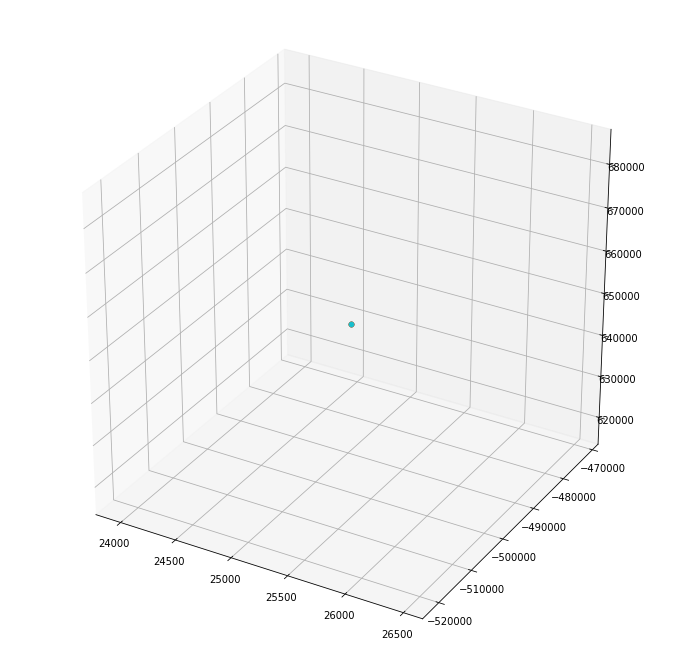

In [27]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

from tqdm import trange
simulation_steps = 10
time_step = 0.001  # s
simulation_history = []

plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

# vx0, vy0, vz0 = 0,0,0
objects_steps = []
for simulation_step in trange(simulation_steps):

    x_res, y_res, z_res, vx_res, vy_res, vz_res = \
    sim.run(x0, y0, z0, vx0, vy0, vz0, x0.size,vzsteps= int(1), timestep = float(1.0))


    x0, y0, z0, vx0, vy0, vz0 = x_res, y_res, z_res, vx_res, vy_res, vz_res
    ax.scatter3D( x_res, y_res, z_res)

simulation_history.append(objects_steps)

# CPU

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = False)

In [ ]:

x_res, y_res, z_res, vx_res, vy_res, vz_res = \
sim.run(x0, y0, z0, vx0, vy0, vz0, vzsteps=month, timestep = 0.1)

In [ ]:
x_res, y_res, z_res, vx_res, vy_res, vz_res

# GPU

In [ ]:
!ls src/python_package/

In [ ]:
from src.python_package.space_junk_simulator import space_simulator
sim = space_simulator(gpu = True)

In [ ]:
!/usr/local/cuda/bin/nvcc -ccbin g++

In [ ]:
import ctypes
so_gpu_path = "/home/ipharitonov/space_junk_simulator/src/python_package/python_package_gpu.so"
solver_gpu = ctypes.CDLL(so_gpu_path)

In [ ]:
!nvcc -c space_junk_simulator/src/gpu/gpu_solver.cu -o space_junk_simulator/src/gpu/gpu_solver.o -Xcompiler -fPIC

In [ ]:
solver_gpu.solve_cpu

# Тест напрямую

In [ ]:
import os
import matplotlib.pyplot as plt
import subprocess
import json

In [ ]:
#run binary
FNULL = open(os.devnull, 'w')    #use this if you want to suppress output to stdout from the subprocess
args = "../bin/spacejunk_debug_cpu.exe ../source/cfg.txt output.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
#set cfg.txt
cfg = {
    "objects" : [
        {
            "x" : 0.0, 
            "y" : 7645200.0,
            "z" : 0.0,
            "vx" : 7220.0,
            "vy" : 0.0,
            "vz" : 0.0,
            "size" : 1.0
        }
    ],
    "time" : 0.0,
    "dt" : 1.0,
    "maxSteps" : 1000.0,
    "steps" : 1000,
    "logObjects" : (0)
}
with open("cfg.txt", "w") as f:
    f.write(json.dumps(cfg))

In [ ]:
!ls

In [ ]:
args = " cfg.txt output_2.txt"
subprocess.call(args, stdout=FNULL, stderr=FNULL, shell=False)

In [ ]:
with open("output_2.txt", "r") as res:
    l = res.read()
    print(l)